In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global_laptop_selling_data.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [6]:
df = df.drop('laptop_ID', axis=1)

In [7]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [8]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [11]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [12]:
df_product_price #company base a mean price 

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [13]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


In [14]:
df_product_price.head()

,Product Avg Price
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333


In [15]:
df_product_price.index

Index(['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei',
       'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP',
       'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero'],
      dtype='object', name='Company')

Text(0.5, 1.0, 'Average Price Per Company')

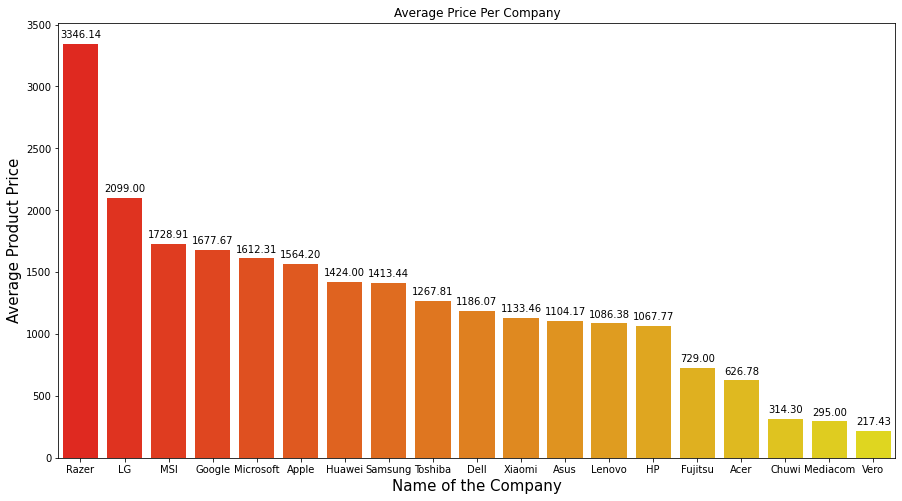

In [16]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [17]:
#linear regression 2 types--> Gradient Descent and Least Square
#KNN regression
#Logistic regression
#MUltivariable linar regression


In [18]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [19]:
df_product_price.to_csv('product_service.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [21]:
df.dropna(inplace=True) 

#Handleing "ScreenResolution" column

In [22]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [23]:
#lat-lon er comma remove kori

#lat-lon k 2 ta column a split kori.
#split(',') separate kore dibe value 2 ta k jkehane 'comma' ache
#expand = True value 2 ta k 2 ta column a expand kore dibe
#df3[['lat','lon']] = df3['lat-lon'].str.split(',',expand = True)
#df3.drop(columns=['lat-lon'], inplace=True)
###df3.head()

In [24]:
df[['Screen','Screen_Resoluton_Height']] = df['ScreenResolution'].str.split('x',expand=True)
#screen 
#resolution -- >width x height format

In [25]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600


In [26]:
df['Screen_Resoluton_Height']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Screen_Resoluton_Height, Length: 1303, dtype: object

In [27]:
df["Screen_Resoluton_Height"] = pd.to_numeric(df["Screen_Resoluton_Height"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   ScreenResolution         1303 non-null   object 
 5   Cpu                      1303 non-null   object 
 6   Ram                      1303 non-null   int64  
 7   Memory                   1303 non-null   object 
 8   Gpu                      1303 non-null   object 
 9   OpSys                    1303 non-null   object 
 10  Weight                   1303 non-null   float64
 11  Price_euros              1303 non-null   float64
 12  Screen                   1303 non-null   object 
 13  Screen_Resoluton_Height  1303 non-null   int64  
dtypes: float64(3), int64(2),

In [29]:
df['Screen']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: Screen, Length: 1303, dtype: object

In [30]:
'''import pandas as pd

data = ['my namse is 9999',
'my proma is 7878',
'tasnim has 990',
'XTY 111 86458']

dff = pd.DataFrame(data=data, columns=['col'])

dff[["Name", "sep", "No"]] = dff["col"].str.split("(\d\d)", n=1, expand=True)'''

'import pandas as pd\n\ndata = [\'my namse is 9999\',\n\'my proma is 7878\',\n\'tasnim has 990\',\n\'XTY 111 86458\']\n\ndff = pd.DataFrame(data=data, columns=[\'col\'])\n\ndff[["Name", "sep", "No"]] = dff["col"].str.split("(\\d\\d)", n=1, expand=True)'

In [31]:
#dff.head()

In [32]:
df[["Screen_Display", "sep","Screen_Resoluton_Width"]] = df["Screen"].str.split("(\d\d)", n=1, expand=True)
df["Screen_Resoluton_Width"] = df["sep"] + df["Screen_Resoluton_Width"]
df.drop("sep", inplace=True, axis=1)

In [33]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080,Full HD,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560


In [34]:
df['Screen_Resoluton_Width']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: Screen_Resoluton_Width, Length: 1303, dtype: object

In [35]:
df["Screen_Resoluton_Width"] = pd.to_numeric(df["Screen_Resoluton_Width"])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   ScreenResolution         1303 non-null   object 
 5   Cpu                      1303 non-null   object 
 6   Ram                      1303 non-null   int64  
 7   Memory                   1303 non-null   object 
 8   Gpu                      1303 non-null   object 
 9   OpSys                    1303 non-null   object 
 10  Weight                   1303 non-null   float64
 11  Price_euros              1303 non-null   float64
 12  Screen                   1303 non-null   object 
 13  Screen_Resoluton_Height  1303 non-null   int64  
 14  Screen_Display          

In [37]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080,Full HD,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560


In [38]:
df.drop('Screen',axis=1,inplace=True)
df.drop('ScreenResolution',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Cpu                      1303 non-null   object 
 5   Ram                      1303 non-null   int64  
 6   Memory                   1303 non-null   object 
 7   Gpu                      1303 non-null   object 
 8   OpSys                    1303 non-null   object 
 9   Weight                   1303 non-null   float64
 10  Price_euros              1303 non-null   float64
 11  Screen_Resoluton_Height  1303 non-null   int64  
 12  Screen_Display           1303 non-null   object 
 13  Screen_Resoluton_Width   1303 non-null   int64  
dtypes: float64(3), int64(3),

We have split **ScreenResolution** column into three columns

Screen_Resoluton_Height 

Screen_Display

Screen_Resoluton_Width   
  

#Handleing "Cpu" Column

In [40]:
df['Cpu'].head(100)

0            Intel Core i5 2.3GHz
1            Intel Core i5 1.8GHz
2      Intel Core i5 7200U 2.5GHz
3            Intel Core i7 2.7GHz
4            Intel Core i5 3.1GHz
                 ...             
95     Intel Core i5 8250U 1.6GHz
96     Intel Core i7 7500U 2.7GHz
97       Intel Core i3 6006U 2GHz
98     Intel Core i3 7100U 2.4GHz
99    Intel Core i7 7700HQ 2.8GHz
Name: Cpu, Length: 100, dtype: object

In [41]:
df[['Cpu_Core','Cpu_Processor_Speed_GHz']] = df['Cpu'].str.rsplit(" ", n=1, expand=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Cpu                      1303 non-null   object 
 5   Ram                      1303 non-null   int64  
 6   Memory                   1303 non-null   object 
 7   Gpu                      1303 non-null   object 
 8   OpSys                    1303 non-null   object 
 9   Weight                   1303 non-null   float64
 10  Price_euros              1303 non-null   float64
 11  Screen_Resoluton_Height  1303 non-null   int64  
 12  Screen_Display           1303 non-null   object 
 13  Screen_Resoluton_Width   1303 non-null   int64  
 14  Cpu_Core                

In [43]:
df.drop('Cpu',axis=1,inplace=True)

In [44]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3GHz
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8GHz
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5GHz
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7GHz
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1GHz


In [45]:
df["Cpu_Processor_Speed_GHz"] = df["Cpu_Processor_Speed_GHz"].str.replace("GHz","")
df["Cpu_Processor_Speed_GHz"] = pd.to_numeric(df["Cpu_Processor_Speed_GHz"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   int64  
 5   Memory                   1303 non-null   object 
 6   Gpu                      1303 non-null   object 
 7   OpSys                    1303 non-null   object 
 8   Weight                   1303 non-null   float64
 9   Price_euros              1303 non-null   float64
 10  Screen_Resoluton_Height  1303 non-null   int64  
 11  Screen_Display           1303 non-null   object 
 12  Screen_Resoluton_Width   1303 non-null   int64  
 13  Cpu_Core                 1303 non-null   object 
 14  Cpu_Processor_Speed_GHz 

In [47]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1


#Memory column Handeling

In [48]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [49]:
df[['Memory(storage_amount)','Memory(storage_device)']] = df['Memory'].str.split(" ", n=1, expand=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   int64  
 5   Memory                   1303 non-null   object 
 6   Gpu                      1303 non-null   object 
 7   OpSys                    1303 non-null   object 
 8   Weight                   1303 non-null   float64
 9   Price_euros              1303 non-null   float64
 10  Screen_Resoluton_Height  1303 non-null   int64  
 11  Screen_Display           1303 non-null   object 
 12  Screen_Resoluton_Width   1303 non-null   int64  
 13  Cpu_Core                 1303 non-null   object 
 14  Cpu_Processor_Speed_GHz 

In [51]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_amount),Memory(storage_device)
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,128GB,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,128GB,Flash Storage
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,256GB,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,512GB,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,256GB,SSD


In [52]:
df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")
df["Memory(storage_amount)_GB"] = pd.to_numeric(df["Memory(storage_amount)_GB"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [53]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_amount),Memory(storage_device),Memory(storage_amount)_GB
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,128GB,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,128GB,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,256GB,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,512GB,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,256GB,SSD,256.0


In [54]:
df.drop('Memory(storage_amount)',axis=1,inplace=True)

In [55]:

df.drop('Memory',axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1303 non-null   object 
 1   Product                    1303 non-null   object 
 2   TypeName                   1303 non-null   object 
 3   Inches                     1303 non-null   float64
 4   Ram                        1303 non-null   int64  
 5   Gpu                        1303 non-null   object 
 6   OpSys                      1303 non-null   object 
 7   Weight                     1303 non-null   float64
 8   Price_euros                1303 non-null   float64
 9   Screen_Resoluton_Height    1303 non-null   int64  
 10  Screen_Display             1303 non-null   object 
 11  Screen_Resoluton_Width     1303 non-null   int64  
 12  Cpu_Core                   1303 non-null   object 
 13  Cpu_Processor_Speed_GHz    1303 non-null   float

In [57]:
# y holo Price_euros

#more preprocessing

In [58]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [59]:
df.shape

(1275, 16)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   object 
 1   Product                    1275 non-null   object 
 2   TypeName                   1275 non-null   object 
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   int64  
 5   Gpu                        1275 non-null   object 
 6   OpSys                      1275 non-null   object 
 7   Weight                     1275 non-null   float64
 8   Price_euros                1275 non-null   float64
 9   Screen_Resoluton_Height    1275 non-null   int64  
 10  Screen_Display             1275 non-null   object 
 11  Screen_Resoluton_Width     1275 non-null   int64  
 12  Cpu_Core                   1275 non-null   object 
 13  Cpu_Processor_Speed_GHz    1275 non-null   float

#Scatter Plot

correlation  0.7402865271622695




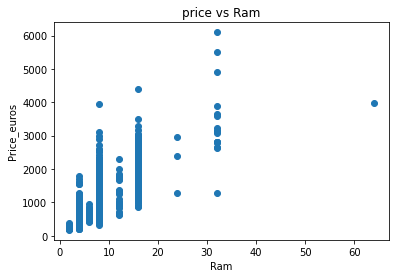

In [61]:
p_correlation = df['Ram'].corr(df['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=df['Ram'],y=df['Price_euros']);
plt.xlabel('Ram')
plt.ylabel('Price_euros') 
plt.title('price vs Ram');

correlation  0.21188344492206526




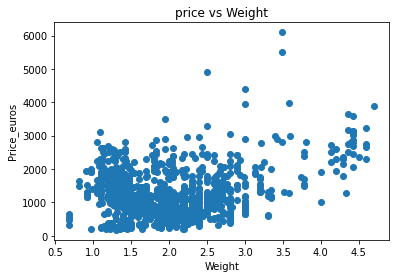

In [62]:
p_correlation = df['Weight'].corr(df['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=df['Weight'],y=df['Price_euros']);
plt.xlabel('Weight')
plt.ylabel('Price_euros') 
plt.title('price vs Weight');

#X,Y separate

In [63]:
X = df.drop('Price_euros',axis=1)

In [64]:
Y = df[['Price_euros']]

In [65]:
X.shape

(1275, 15)

In [66]:
Y.shape

(1275, 1)

#Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
from pandas.core.dtypes.common import is_numeric_dtype

In [70]:
for column in X.columns:
    if is_numeric_dtype(X[column]):
        continue
    X[column] = le.fit_transform(X[column])

In [71]:
X.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,1,300,4,13.3,8,58,8,1.37,1600,12,2560,51,2.3,5,128.0
1,1,301,4,13.3,8,51,8,1.34,900,0,1440,51,1.8,0,128.0
2,7,50,3,15.6,8,53,4,1.86,1080,3,1920,57,2.5,5,256.0
3,1,300,4,15.4,16,9,8,1.83,1800,12,2880,65,2.7,5,512.0
4,1,300,4,13.3,8,59,8,1.37,1600,12,2560,51,3.1,5,256.0


#Freature Engineering
#Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler


In [73]:
minmax = MinMaxScaler(feature_range=(0,1)) # feature_range=(0, 1)

In [74]:
len(X.columns)

15

In [75]:
for column in X.columns:
    
    X[column] = minmax.fit_transform(X[[column]])

In [76]:
X.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,0.055556,0.486224,0.8,0.385542,0.096774,0.532110,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.518519,0.454545,0.248532
1,0.055556,0.487844,0.8,0.385542,0.096774,0.467890,1.0,0.162095,0.094828,0.00,0.029911,0.554348,0.333333,0.000000,0.248532
2,0.388889,0.081037,0.6,0.662651,0.096774,0.486239,0.5,0.291771,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
3,0.055556,0.486224,0.8,0.638554,0.225806,0.082569,1.0,0.284289,0.741379,0.60,0.611964,0.706522,0.666667,0.454545,1.000000
4,0.055556,0.486224,0.8,0.385542,0.096774,0.541284,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.814815,0.454545,0.499022


In [77]:
Y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   float64
 1   Product                    1275 non-null   float64
 2   TypeName                   1275 non-null   float64
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   float64
 5   Gpu                        1275 non-null   float64
 6   OpSys                      1275 non-null   float64
 7   Weight                     1275 non-null   float64
 8   Screen_Resoluton_Height    1275 non-null   float64
 9   Screen_Display             1275 non-null   float64
 10  Screen_Resoluton_Width     1275 non-null   float64
 11  Cpu_Core                   1275 non-null   float64
 12  Cpu_Processor_Speed_GHz    1275 non-null   float64
 13  Memory(storage_device)     1275 non-null   float

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   object 
 1   Product                    1275 non-null   object 
 2   TypeName                   1275 non-null   object 
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   int64  
 5   Gpu                        1275 non-null   object 
 6   OpSys                      1275 non-null   object 
 7   Weight                     1275 non-null   float64
 8   Price_euros                1275 non-null   float64
 9   Screen_Resoluton_Height    1275 non-null   int64  
 10  Screen_Display             1275 non-null   object 
 11  Screen_Resoluton_Width     1275 non-null   int64  
 12  Cpu_Core                   1275 non-null   object 
 13  Cpu_Processor_Speed_GHz    1275 non-null   float

#correlation

In [80]:
X.corr()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
Company,1.000000,0.069802,0.001678,-0.082380,0.041771,0.022773,0.127853,-0.128194,0.043498,0.083922,0.046347,0.023631,0.133191,0.101731,0.107550
Product,0.069802,1.000000,0.076330,-0.213195,0.018830,0.094726,0.114857,-0.244554,0.158163,0.199818,0.157595,0.154984,-0.043060,0.053956,0.116374
TypeName,0.001678,0.076330,1.000000,-0.086162,-0.242265,-0.207889,0.090069,-0.275440,-0.059244,-0.211522,-0.074363,-0.119149,-0.082810,-0.195650,0.061059
Inches,-0.082380,-0.213195,-0.086162,1.000000,0.241078,0.217168,0.039672,0.826638,-0.093062,-0.282932,-0.068223,0.142788,0.305037,0.183145,-0.100987
Ram,0.041771,0.018830,-0.242265,0.241078,1.000000,0.393143,0.140002,0.389370,0.415241,0.219431,0.424089,0.445475,0.366254,0.472031,0.187187
Gpu,0.022773,0.094726,-0.207889,0.217168,0.393143,1.000000,0.098538,0.337428,0.221979,0.156902,0.232852,0.490863,0.296863,0.289555,0.038249
OpSys,0.127853,0.114857,0.090069,0.039672,0.140002,0.098538,1.000000,0.011309,0.149078,0.069145,0.148355,0.108014,0.219762,0.259775,0.192880
Weight,-0.128194,-0.244554,-0.275440,0.826638,0.389370,0.337428,0.011309,1.000000,-0.050106,-0.155452,-0.028605,0.179937,0.318649,0.225176,-0.105474
Screen_Resoluton_Height,0.043498,0.158163,-0.059244,-0.093062,0.415241,0.221979,0.149078,-0.050106,1.000000,0.478766,0.994069,0.300759,0.164369,0.335553,0.155782
Screen_Display,0.083922,0.199818,-0.211522,-0.282932,0.219431,0.156902,0.069145,-0.155452,0.478766,1.000000,0.451459,0.205034,0.031605,0.203254,0.074855


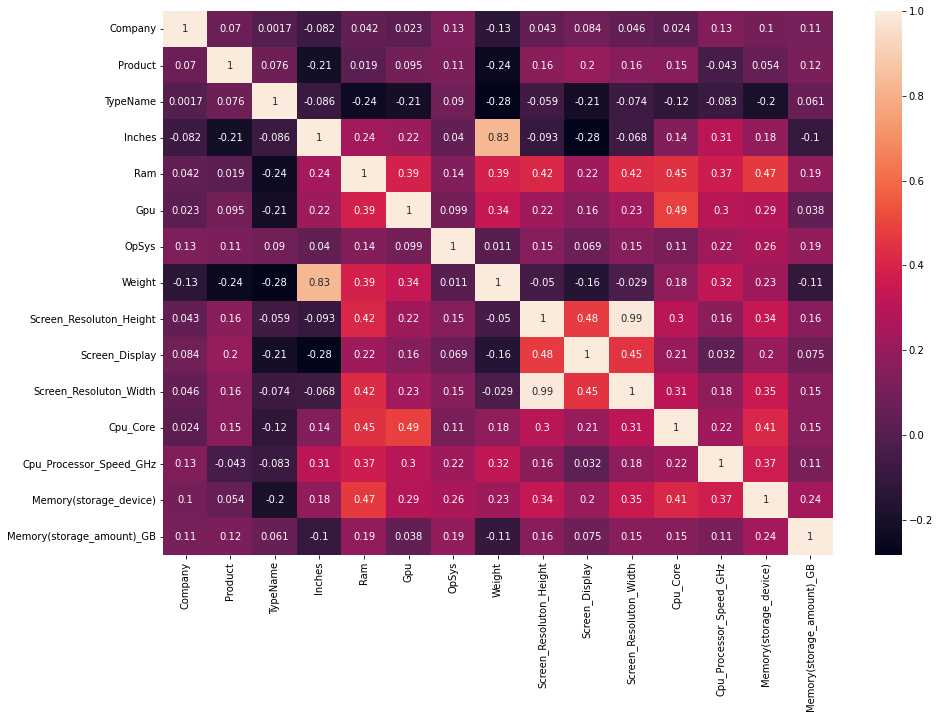

In [81]:
plt.subplots(figsize=(15,10)) 
sns.heatmap(X.corr() , annot=True)

#checking unique values

In [82]:
df.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,SSD,256.0


In [83]:
for column in df.columns:
    n=df[column].nunique()
    print('unique values for ', column ,' is ', n)

unique values for  Company  is  19
unique values for  Product  is  618
unique values for  TypeName  is  6
unique values for  Inches  is  18
unique values for  Ram  is  9
unique values for  Gpu  is  110
unique values for  OpSys  is  9
unique values for  Weight  is  171
unique values for  Price_euros  is  791
unique values for  Screen_Resoluton_Height  is  10
unique values for  Screen_Display  is  21
unique values for  Screen_Resoluton_Width  is  13
unique values for  Cpu_Core  is  93
unique values for  Cpu_Processor_Speed_GHz  is  25
unique values for  Memory(storage_device)  is  12
unique values for  Memory(storage_amount)_GB  is  13


#visualization

Text(0.5, 1.0, 'Distribution of Weight')

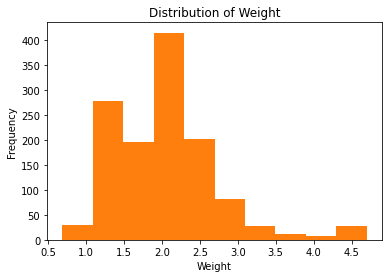

In [84]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Weight'])
plt.hist(df['Weight']);
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")

Text(0.5, 1.0, 'Distribution of Company')

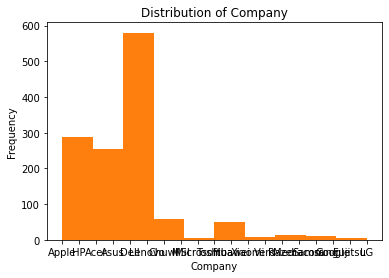

In [85]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Company'])
plt.hist(df['Company']);
plt.xlabel("Company")
plt.ylabel("Frequency")
plt.title("Distribution of Company")

Text(0.5, 1.0, 'Distribution of Cpu_Core')

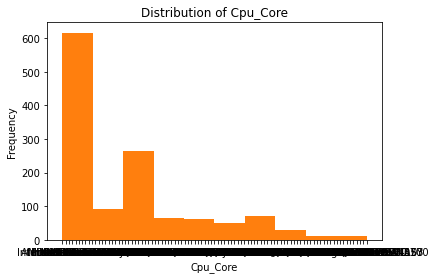

In [86]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Cpu_Core'])
plt.hist(df['Cpu_Core']);
plt.xlabel("Cpu_Core")
plt.ylabel("Frequency")
plt.title("Distribution of Cpu_Core")

Text(0.5, 1.0, 'Distribution of Ram')

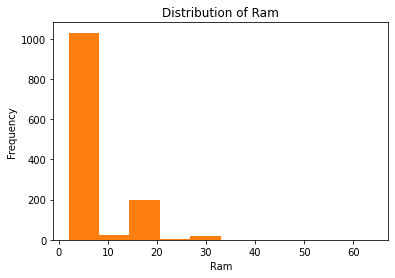

In [87]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Ram'])
plt.hist(df['Ram']);
plt.xlabel("Ram")
plt.ylabel("Frequency")
plt.title("Distribution of Ram")

Text(0.5, 1.0, 'Distribution of Memory(storage_amount)_GB')

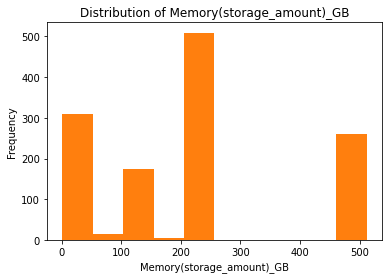

In [88]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Memory(storage_amount)_GB'])
plt.hist(df['Memory(storage_amount)_GB']);
plt.xlabel("Memory(storage_amount)_GB")
plt.ylabel("Frequency")
plt.title("Distribution of Memory(storage_amount)_GB")

Text(0.5, 1.0, 'Distribution of Screen_Resoluton_Width')

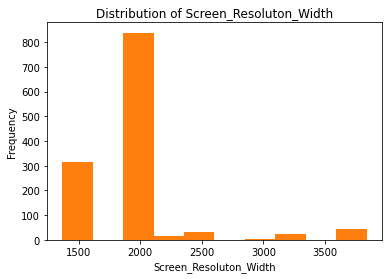

In [89]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Screen_Resoluton_Width'])
plt.hist(df['Screen_Resoluton_Width']);
plt.xlabel("Screen_Resoluton_Width")
plt.ylabel("Frequency")
plt.title("Distribution of Screen_Resoluton_Width")

Text(0.5, 1.0, 'Distribution of Screen_Resoluton_Height')

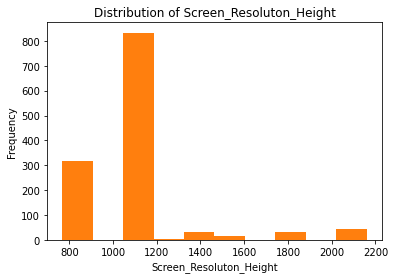

In [90]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Screen_Resoluton_Height'])
plt.hist(df['Screen_Resoluton_Height']);
plt.xlabel("Screen_Resoluton_Height")
plt.ylabel("Frequency")
plt.title("Distribution of Screen_Resoluton_Height")

Text(0.5, 1.0, 'Distribution of Gpu')

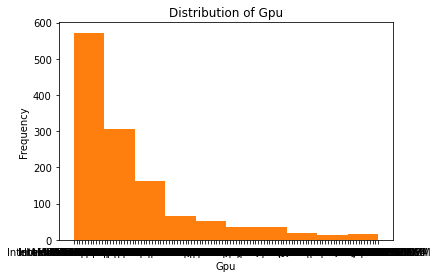

In [91]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Gpu'])
plt.hist(df['Gpu']);
plt.xlabel("Gpu")
plt.ylabel("Frequency")
plt.title("Distribution of Gpu")

#Cross Validation (Hold Out)

In [92]:
from sklearn.model_selection import train_test_split as tts

In [93]:
xtrain,xtest,ytrain,ytest=tts(X,Y,train_size=.70,random_state=24)

In [94]:
xtrain.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
1168,0.388889,0.690438,0.6,0.469880,0.000000,0.376147,0.625,0.187032,0.000000,0.00,0.000000,0.347826,0.259259,0.000000,0.060665
1108,0.388889,0.055105,0.6,0.662651,0.032258,0.137615,0.625,0.351621,0.224138,0.15,0.223929,0.076087,0.592593,0.181818,0.000000
801,0.111111,0.583468,0.6,0.662651,0.096774,0.486239,0.625,0.418953,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
1102,0.000000,0.149109,0.6,0.662651,0.032258,0.366972,0.125,0.376559,0.000000,0.00,0.000000,0.315217,0.222222,0.454545,0.029354
220,0.222222,0.388979,0.6,0.662651,0.096774,0.055046,0.250,0.376559,0.224138,0.15,0.223929,0.695652,0.259259,0.454545,0.499022


In [95]:
ytrain.head()

,Price_euros
1168,249.00
1108,398.00
801,1099.00
1102,209.00
220,677.35


#Linear Regression (Multiple Variable)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr= LinearRegression()

In [98]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [99]:
lr.score(xtest,ytest) #with hold out cross validation

0.7208464521362532

In [100]:
lr.score(xtrain,ytrain) #with hold out cross validation

0.7226107150717276

In [101]:
score_linear_reg = lr.score(xtest,ytest)

#Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
d_tree_reg=DecisionTreeRegressor()

In [104]:
d_tree_reg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [105]:
d_tree_reg.score(xtrain,ytrain)

0.999591940009795

In [106]:
d_tree_reg.score(xtest,ytest)

0.6899112546612627

In [107]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)

#Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
random_fr_reg=RandomForestRegressor()

In [110]:
random_fr_reg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [111]:
random_fr_reg.score(xtest,ytest)

0.8357699658435672

In [112]:
random_fr_reg.score(xtrain,ytrain)

0.9776040973506723

#KNN Regressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
KNN=KNeighborsRegressor()

In [115]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [116]:
KNN.score(xtest,ytest)

0.7557980992229392

In [117]:
KNN.score(xtrain,ytrain)

0.8096572789385164

#SVM

In [118]:
from sklearn.svm import SVR

In [119]:
sv=SVR()

In [120]:
sv.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [121]:
sv.score(xtrain,ytrain)

0.02791279002995839

In [122]:
sv.score(xtest,ytest)

-0.0223626709585365

#Ada-Boost-Regressor

In [123]:
from sklearn.ensemble import AdaBoostRegressor

In [124]:
ada=AdaBoostRegressor()

In [125]:
ada.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [126]:
ada.score(xtrain,ytrain)

0.6927595167126455

In [127]:
ada.score(xtest,ytest)

0.6517170337704208

#XG BOOST 

In [128]:
import xgboost as xg

In [129]:
xgb = xg.XGBRegressor()

In [130]:
xgb.fit(xtrain,ytrain)

[17:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [131]:
xgb.score(xtrain,ytrain)

0.933405238119039

In [132]:
xgb.score(xtest,ytest)

0.8526208702573055

#Gradient Boost

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
gBoost=GradientBoostingRegressor()

In [135]:
gBoost.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [136]:
gBoost.score(xtrain,ytrain)

0.9406159382108574

In [137]:
gBoost.score(xtest,ytest)

0.844766972602549

#Feature Selection Pearson Correlation

In [138]:
cor = xtrain.corr()

In [139]:
cor

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
Company,1.000000,0.075016,0.007010,-0.060097,0.049165,0.043289,0.149079,-0.118034,0.043164,0.094509,0.048245,0.029538,0.142219,0.101622,0.096142
Product,0.075016,1.000000,0.074279,-0.203488,0.045391,0.091125,0.157267,-0.235618,0.177030,0.208722,0.176641,0.177444,-0.031322,0.064561,0.185911
TypeName,0.007010,0.074279,1.000000,-0.102309,-0.253103,-0.234083,0.070548,-0.298304,-0.102317,-0.221495,-0.118858,-0.129311,-0.088935,-0.207690,0.062363
Inches,-0.060097,-0.203488,-0.102309,1.000000,0.218425,0.214064,0.013702,0.815089,-0.083820,-0.286668,-0.064137,0.123703,0.273482,0.156062,-0.122669
Ram,0.049165,0.045391,-0.253103,0.218425,1.000000,0.380135,0.128883,0.367796,0.470138,0.235899,0.476536,0.459398,0.363572,0.484550,0.191457
Gpu,0.043289,0.091125,-0.234083,0.214064,0.380135,1.000000,0.068614,0.344656,0.230007,0.167470,0.239124,0.487955,0.270787,0.259738,0.011070
OpSys,0.149079,0.157267,0.070548,0.013702,0.128883,0.068614,1.000000,-0.014388,0.183108,0.104885,0.175772,0.104242,0.208577,0.228735,0.162835
Weight,-0.118034,-0.235618,-0.298304,0.815089,0.367796,0.344656,-0.014388,1.000000,-0.020232,-0.149874,-0.002878,0.173181,0.300156,0.206547,-0.148535
Screen_Resoluton_Height,0.043164,0.177030,-0.102317,-0.083820,0.470138,0.230007,0.183108,-0.020232,1.000000,0.480807,0.995082,0.302611,0.179415,0.355453,0.169608
Screen_Display,0.094509,0.208722,-0.221495,-0.286668,0.235899,0.167470,0.104885,-0.149874,0.480807,1.000000,0.459184,0.213472,0.045379,0.213399,0.079652


In [140]:
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr() #correlation matrix

    for i in range(len(corr_matrix.columns)): # matrix er each column i c
        for j in range (i): #each column er moddhe (row) column
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [141]:
corr_features  =  correlation(xtrain,0.70)

In [142]:
corr_features

{'Screen_Resoluton_Width', 'Weight'}

In [143]:
xtrain.drop(corr_features, axis=1)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Screen_Resoluton_Height,Screen_Display,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
1168,0.388889,0.690438,0.6,0.469880,0.000000,0.376147,0.625,0.000000,0.00,0.347826,0.259259,0.000000,0.060665
1108,0.388889,0.055105,0.6,0.662651,0.032258,0.137615,0.625,0.224138,0.15,0.076087,0.592593,0.181818,0.000000
801,0.111111,0.583468,0.6,0.662651,0.096774,0.486239,0.625,0.224138,0.15,0.619565,0.592593,0.454545,0.499022
1102,0.000000,0.149109,0.6,0.662651,0.032258,0.366972,0.125,0.000000,0.00,0.315217,0.222222,0.454545,0.029354
220,0.222222,0.388979,0.6,0.662651,0.096774,0.055046,0.250,0.224138,0.15,0.695652,0.259259,0.454545,0.499022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.111111,0.983793,0.8,0.469880,0.096774,0.559633,0.625,0.224138,0.15,0.880435,0.333333,0.454545,0.499022
343,0.555556,0.957861,0.0,0.457831,0.225806,0.559633,0.625,1.000000,0.35,0.880435,0.333333,0.454545,1.000000
192,1.000000,0.491086,0.8,0.385542,0.096774,0.899083,0.500,0.224138,0.40,0.619565,0.592593,0.454545,0.499022
899,0.222222,0.455429,0.6,0.662651,0.096774,0.486239,0.625,0.224138,0.15,0.641304,0.629630,0.181818,0.976517


In [144]:
xtest.drop(corr_features, axis=1)

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Screen_Resoluton_Height,Screen_Display,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
64,0.388889,0.081037,0.6,0.662651,0.096774,0.486239,0.625,0.224138,0.15,0.619565,0.592593,0.454545,0.499022
98,0.111111,0.912480,0.6,0.662651,0.064516,0.596330,0.625,0.224138,0.15,0.532609,0.555556,0.454545,0.499022
851,0.111111,0.636953,0.2,0.662651,0.225806,0.724771,0.625,0.224138,0.15,0.836957,0.703704,0.636364,0.248532
1142,0.388889,0.679092,0.0,0.385542,0.096774,0.431193,0.625,0.224138,0.20,0.597826,0.555556,0.454545,0.499022
611,0.222222,0.411669,0.2,0.662651,0.225806,0.807339,0.625,0.224138,0.15,0.750000,0.629630,0.181818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.555556,0.335494,0.6,0.662651,0.032258,0.146789,0.500,0.000000,0.00,0.076087,0.740741,0.181818,0.976517
1256,0.111111,0.633712,0.2,0.867470,0.225806,0.834862,0.625,0.224138,0.40,0.750000,0.629630,0.636364,0.248532
1263,0.000000,0.119935,0.6,0.662651,0.032258,0.376147,0.250,0.000000,0.00,0.347826,0.259259,0.181818,0.976517
694,0.888889,0.666126,0.6,0.385542,0.096774,0.486239,0.625,0.224138,0.40,0.619565,0.592593,0.454545,0.499022


#Linear Regression (Multiple Variable)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lr= LinearRegression()

In [147]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [148]:
lr.score(xtest,ytest) #with hold out cross validation

0.7208464521362532

In [149]:
lr.score(xtrain,ytrain) #with hold out cross validation

0.7226107150717276

In [150]:
score_linear_reg = lr.score(xtest,ytest)

#Decision Tree Regressor

In [151]:
from sklearn.tree import DecisionTreeRegressor

In [152]:
d_tree_reg=DecisionTreeRegressor()

In [153]:
d_tree_reg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [154]:
d_tree_reg.score(xtrain,ytrain)

0.999591940009795

In [155]:
d_tree_reg.score(xtest,ytest)

0.7203811841796869

In [156]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)

#Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
random_fr_reg=RandomForestRegressor()

In [159]:
random_fr_reg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [160]:
random_fr_reg.score(xtest,ytest)

0.8261917537086991

In [161]:
random_fr_reg.score(xtrain,ytrain)

0.9780396433518413

#KNN Regressor

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
KNN=KNeighborsRegressor()

In [164]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [165]:
KNN.score(xtest,ytest)

0.7557980992229392

In [166]:
KNN.score(xtrain,ytrain)

0.8096572789385164

#Another Feature Selection SelectKBest

In [167]:
from sklearn.feature_selection import SelectKBest

In [168]:
from sklearn.feature_selection import f_classif

In [169]:
FIT_FEATURES = SelectKBest(score_func = f_classif);

In [170]:
FIT_FEATURES.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest()

In [171]:
score = pd.DataFrame(FIT_FEATURES.scores_, columns=['score_value'])

In [172]:
score

,score_value
0,1.183349
1,1.176941
2,1.024259
3,1.144952
4,4.310879
5,1.463828
6,1.580483
7,1.338628
8,1.468413
9,1.485271


In [173]:
name_col = pd.DataFrame(X.columns)

In [174]:
topr_features = pd.concat([name_col,score], axis=1)

In [175]:
topr_features

,0,score_value
0,Company,1.183349
1,Product,1.176941
2,TypeName,1.024259
3,Inches,1.144952
4,Ram,4.310879
5,Gpu,1.463828
6,OpSys,1.580483
7,Weight,1.338628
8,Screen_Resoluton_Height,1.468413
9,Screen_Display,1.485271


In [176]:
topr_features = topr_features.nlargest(11,'score_value')


In [177]:
topr_features

,0,score_value
4,Ram,4.310879
13,Memory(storage_device),1.962378
12,Cpu_Processor_Speed_GHz,1.653374
6,OpSys,1.580483
11,Cpu_Core,1.562606
9,Screen_Display,1.485271
10,Screen_Resoluton_Width,1.476987
8,Screen_Resoluton_Height,1.468413
5,Gpu,1.463828
14,Memory(storage_amount)_GB,1.351404


In [178]:
X.drop('Company',axis=1,inplace=True)


In [179]:
X.head()

,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,0.486224,0.8,0.385542,0.096774,0.532110,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.518519,0.454545,0.248532
1,0.487844,0.8,0.385542,0.096774,0.467890,1.0,0.162095,0.094828,0.00,0.029911,0.554348,0.333333,0.000000,0.248532
2,0.081037,0.6,0.662651,0.096774,0.486239,0.5,0.291771,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
3,0.486224,0.8,0.638554,0.225806,0.082569,1.0,0.284289,0.741379,0.60,0.611964,0.706522,0.666667,0.454545,1.000000
4,0.486224,0.8,0.385542,0.096774,0.541284,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.814815,0.454545,0.499022


In [180]:
X.drop('Product',axis=1,inplace=True)


In [181]:
X.drop('TypeName',axis=1,inplace=True)


In [182]:
X.drop('Inches',axis=1,inplace=True)


In [183]:
X.head()

,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,0.096774,0.532110,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.518519,0.454545,0.248532
1,0.096774,0.467890,1.0,0.162095,0.094828,0.00,0.029911,0.554348,0.333333,0.000000,0.248532
2,0.096774,0.486239,0.5,0.291771,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
3,0.225806,0.082569,1.0,0.284289,0.741379,0.60,0.611964,0.706522,0.666667,0.454545,1.000000
4,0.096774,0.541284,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.814815,0.454545,0.499022


In [184]:
from sklearn.model_selection import train_test_split as tts

In [185]:
xtrain,xtest,ytrain,ytest=tts(X,Y,train_size=.70,random_state=24)

In [186]:
xtrain.head()

,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
1168,0.000000,0.376147,0.625,0.187032,0.000000,0.00,0.000000,0.347826,0.259259,0.000000,0.060665
1108,0.032258,0.137615,0.625,0.351621,0.224138,0.15,0.223929,0.076087,0.592593,0.181818,0.000000
801,0.096774,0.486239,0.625,0.418953,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
1102,0.032258,0.366972,0.125,0.376559,0.000000,0.00,0.000000,0.315217,0.222222,0.454545,0.029354
220,0.096774,0.055046,0.250,0.376559,0.224138,0.15,0.223929,0.695652,0.259259,0.454545,0.499022


#Linear Regression (Multiple Variable)

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lr= LinearRegression()

In [189]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [190]:
lr.score(xtest,ytest) #with hold out cross validation

0.7165204504020155

In [191]:
lr.score(xtrain,ytrain) #with hold out cross validation

0.6994984723538928

In [192]:
score_linear_reg = lr.score(xtest,ytest)

#Decision Tree Regressor

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
d_tree_reg=DecisionTreeRegressor()

In [195]:
d_tree_reg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [196]:
d_tree_reg.score(xtrain,ytrain)

0.9977003904471624

In [197]:
d_tree_reg.score(xtest,ytest)

0.6671699734957512

In [198]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)

#Random Forest Regressor

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
random_fr_reg=RandomForestRegressor()

In [201]:
random_fr_reg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [202]:
random_fr_reg.score(xtest,ytest)

0.8026868985492457

In [203]:
random_fr_reg.score(xtrain,ytrain)

0.9724972031732521

#KNN Regressor

In [204]:
from sklearn.neighbors import KNeighborsRegressor

In [205]:
KNN=KNeighborsRegressor()

In [206]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor()

In [207]:
KNN.score(xtest,ytest)

0.7405391009042132

In [208]:
KNN.score(xtrain,ytrain)

0.816539708824813

#Analaysis


#Accuracy

*   Before Feature Selection 


*      **Linear Regression** **72%**

*      **Decision Tree Regressor**  **68%**

       **Random Forest Regressor**  **84%**

       **KNN Regressor**  **76%**

       **SVM**  3%

       **Ada-Boost-Regressor** **69%**

       **XG Boost** **85%**

       **Gradient Boost** **84%**











*   After Pearson Correlation Feature Selection

       **Linear Regression**  **72%**

*      **Decision Tree Regressor** **72%**

       **Random Forest Regressor**  **83%**

       **KNN Regressor**  **76%**


After Select K Best Feature Selection

Linear Regression 71%

**Decision Tree Regressor 67%**

**Random Forest Regressor 80%**

**KNN Regressor 74%**